# Titanic Surival Prediciton Model
### Feature Engineering and statistics

## Importing Modules

In [315]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [316]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [317]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling NAN and dropping insignificant columns

In [318]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [319]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.drop("Embarked", axis=1, inplace=True)
df.isna().sum()
       

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [320]:
df["deck"]=df["Cabin"]
df["deck"] = df["deck"].str[0]

In [321]:
map = {1: "C",2:"D", 3:"E"}
df.deck=df.deck.fillna(df.Pclass.map(map))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,E
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,D
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,E
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [322]:
df.drop("Cabin",axis=1,inplace=True)
df.drop("Name",axis=1, inplace=True)

In [323]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
deck           0
dtype: int64

## Transforming labeled data into numeric data using label encoder

In [324]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Ticket = le.fit_transform(df.Ticket)
df.deck = le.fit_transform(df.deck)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,deck
0,1,0,3,1,22.000000,1,0,523,7.2500,4
1,2,1,1,0,38.000000,1,0,596,71.2833,2
2,3,1,3,0,26.000000,0,0,669,7.9250,4
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,4
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,3
887,888,1,1,0,19.000000,0,0,14,30.0000,1
888,889,0,3,0,29.699118,1,2,675,23.4500,4
889,890,1,1,1,26.000000,0,0,8,30.0000,2


## Correlation
Using correlation to find which columns have most effect on survival of the passengers, it should be close to 1 or -1 for two columns to be related

In [325]:
df.corr()["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
deck          -0.242066
Ticket        -0.164549
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

## Scaling the features

In [326]:
x = pd.concat([df.iloc[:,0:1],df.iloc[:,2:]], axis=1)
y = df.iloc[:,1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

## now selecting top 4 feature with highest correlation factor

In [327]:
new_x = pd.concat([df.Fare,df.Sex,df.Pclass, df.deck],axis=1)
new_y = y
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2002)
model = LogisticRegression()
model2 = RandomForestClassifier()
model.fit(x_train,y_train)
model2.fit(x_train, y_train)

print(str.center("LogisticRegression",100,"-"), end="\n\n")
print(classification_report(y_test, model.predict(x_test)))
print("\n\n\n\n")
print(str.center("RandomForestClassifier",100,"-"),end="\n\n")
print(classification_report(y_test, model2.predict(x_test)))


-----------------------------------------LogisticRegression-----------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.67      0.74        95

    accuracy                           0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.80      0.80       223






---------------------------------------RandomForestClassifier---------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       128
           1       0.86      0.76      0.80        95

    accuracy                           0.84       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.84      0.84      0.84       223



## Alternate Appraoch: Using Recrusive Feature Elmination

In [328]:
x = pd.DataFrame(x)
rf = LogisticRegression()
rfe = RFE(rf, n_features_to_select=6)
rfe.fit(x,y)
cols = x.columns[rfe.support_]
cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare'], dtype='object')

In [329]:
new_x = pd.concat([df.Pclass,df.Sex,df.Age,df.SibSp, df.Ticket, df.Fare],axis=1)
new_y = y
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2002)
model = LogisticRegression()
model2 = RandomForestClassifier()
model.fit(x_train,y_train)
model2.fit(x_train, y_train)
print(str.center("LogisticRegression",100,"-"), end="\n\n")
print(classification_report(y_test, model.predict(x_test)))
print("\n\n\n\n")
print(str.center("RandomForestClassifier",100,"-"),end="\n\n")
print(classification_report(y_test, model2.predict(x_test)))


-----------------------------------------LogisticRegression-----------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.67      0.74        95

    accuracy                           0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.80      0.80       223






---------------------------------------RandomForestClassifier---------------------------------------

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       128
           1       0.85      0.72      0.78        95

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.82       223



## Finally: printing result for test data

In [330]:
df2 = pd.read_csv("test.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Using same fillna, feature selection, transformation methods

In [331]:
df2["Age"].fillna(df2["Age"].mean(),inplace=True)
df2.drop("Embarked", axis=1, inplace=True)
df2["deck"]=df2["Cabin"]
df2["deck"] = df2["deck"].str[0]
map = {1: "C",2:"D", 3:"E"}
df2.deck=df2.deck.fillna(df2.Pclass.map(map))
df2.drop("Cabin",axis=1,inplace=True)
df2.drop("Name",axis=1, inplace=True)
df2.fillna(df2["Fare"].mean(),inplace=True)
df2.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
deck           0
dtype: int64

In [332]:
df2.Sex = le.fit_transform(df2.Sex)
df2.Ticket = le.fit_transform(df2.Ticket)
df2.deck = le.fit_transform(df2.deck)
test= scaler.fit_transform(df2)
test = pd.DataFrame(test, columns=x.columns)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,deck
0,-1.727912,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.269494,-0.498407,0.700065
1,-1.719625,0.873482,-1.322876,1.325530,0.616992,-0.400248,0.372934,-0.513274,0.700065
2,-1.711337,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-1.005027,-0.465088,-0.291892
3,-1.703050,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.316046,-0.483466,0.700065
4,-1.694763,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.399841,-0.418471,0.700065
...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,0.755929,0.000000,-0.499470,-0.400248,0.801219,-0.494448,0.700065
414,1.703050,-1.505120,-1.322876,0.691586,-0.499470,-0.400248,1.331921,1.313753,-1.283848
415,1.711337,0.873482,0.755929,0.651965,-0.499470,-0.400248,1.536753,-0.508792,0.700065
416,1.719625,0.873482,0.755929,0.000000,-0.499470,-0.400248,0.363624,-0.494448,0.700065


Since model2 that is random forest showed better metrics in classification report therefore using random forest to predict the outputs

## Result

In [333]:
pred = model2.predict(test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

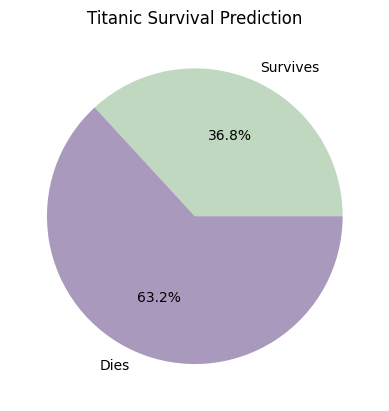

In [334]:
import matplotlib.pyplot as plt 
pred = np.array(pred)
sur = np.sum(pred==1)
die = np.sum(pred==0)
plt.pie([sur,die],labels=["Survives", "Dies"], autopct="%1.1f%%", colors=["#C0D8C0","#A99ABD"])
plt.title("Titanic Survival Prediction")
plt.show()